In [1]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# This magic command ensures plots appear inside the notebook
%matplotlib inline

# Function to easily display images
def show_image(img, title="Image", cmap='gray'):
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

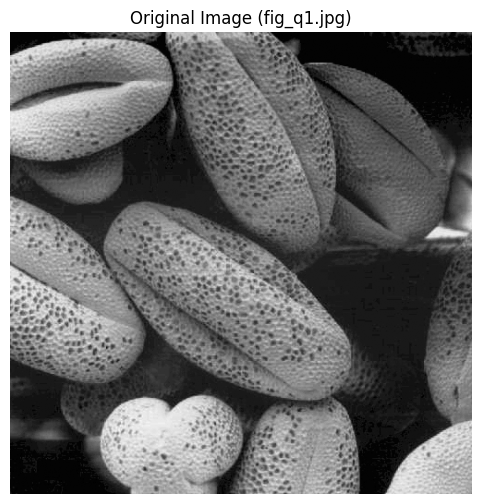

In [2]:
# Load the image in grayscale
img_path = 'fig_q1.jpg'  # Make sure this matches your uploaded filename
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

if img is None:
    print("Error: Image not found. Please upload 'fig_q1.jpg'.")
else:
    show_image(img, "Original Image (fig_q1.jpg)")

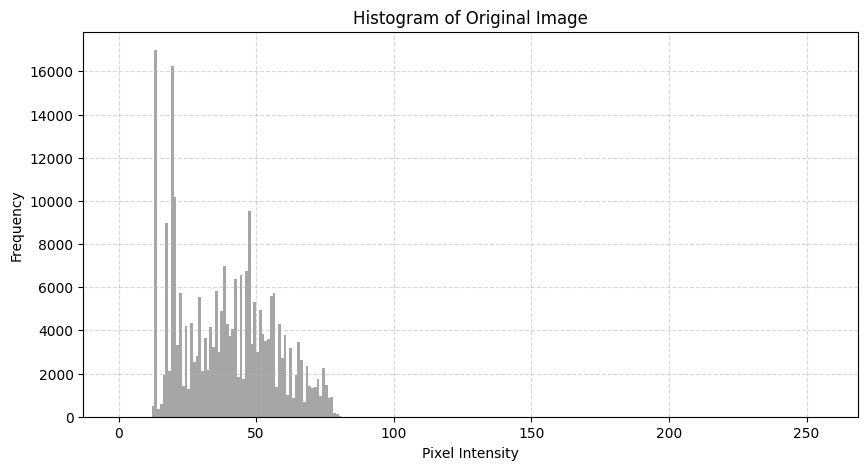

In [3]:
# 1(a) Plot histogram
plt.figure(figsize=(10, 5))
plt.hist(img.ravel(), bins=256, range=[0, 256], color='gray', alpha=0.7)
plt.title('Histogram of Original Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

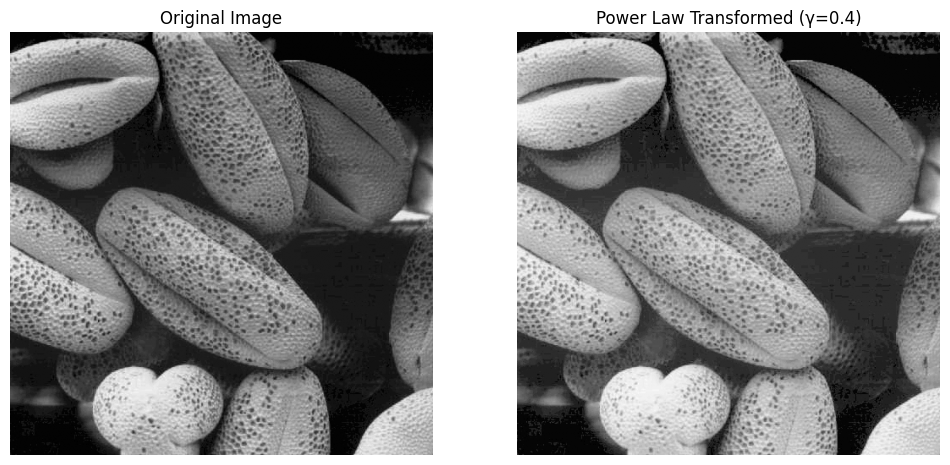

In [4]:
# 1(b) Power Law Transformation
def power_law_transform(image, gamma, c=1):
    # Normalize pixel values to range [0, 1]
    img_normalized = image / 255.0
    # Apply formula s = c * r^gamma
    s = c * np.power(img_normalized, gamma)
    # Scale back to [0, 255]
    s = (s * 255).astype(np.uint8)
    return s

# Choose gamma < 1 to brighten the image
gamma_value = 0.4  # You can experiment with 0.3, 0.4, 0.5
img_gamma = power_law_transform(img, gamma=gamma_value)

# Plot side by side
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_gamma, cmap='gray')
plt.title(f'Power Law Transformed (\u03B3={gamma_value})') # \u03B3 is Gamma symbol
plt.axis('off')

plt.show()

The original image was too dark, with most pixel values concentrated at the low end. By applying a power law transformation with $\gamma < 1$ (specifically 0.4), we expanded the narrow range of dark input values into a wider range of output values. This significantly improved the contrast, making details in the dark regions visible.

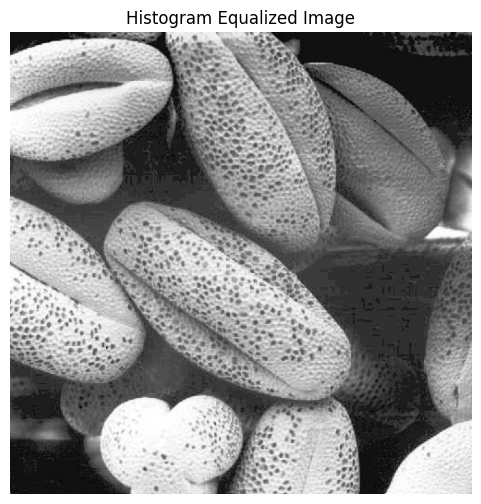

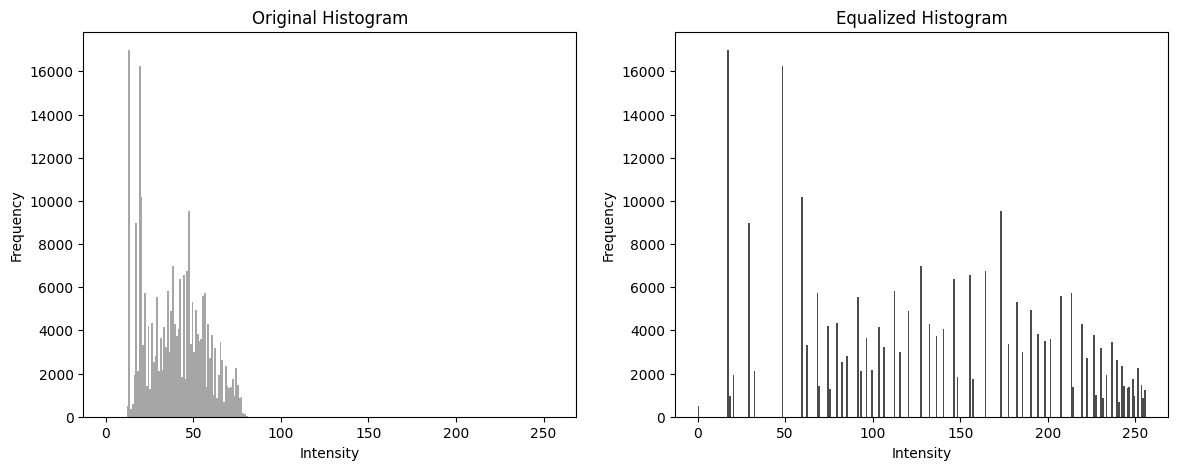

In [5]:
# 1(c) Histogram Normalisation (Equalization)
img_eq = cv2.equalizeHist(img)

# Display the equalized image
show_image(img_eq, "Histogram Equalized Image")

# Compare Histograms
plt.figure(figsize=(14, 5))

# Original Histogram
plt.subplot(1, 2, 1)
plt.hist(img.ravel(), bins=256, range=[0, 256], color='gray', alpha=0.7)
plt.title('Original Histogram')
plt.xlabel('Intensity')
plt.ylabel('Frequency')

# Equalized Histogram
plt.subplot(1, 2, 2)
plt.hist(img_eq.ravel(), bins=256, range=[0, 256], color='black', alpha=0.7)
plt.title('Equalized Histogram')
plt.xlabel('Intensity')
plt.ylabel('Frequency')

plt.show()

Histogram normalization (equalization) redistributed the pixel intensities so that they span the entire range from 0 to 255 more uniformly. While the original histogram was bunched up near 0 (dark), the processed histogram uses the full dynamic range. This results in an image with very high contrast, although sometimes it can introduce noise or make the image look somewhat unnatural compared to the smoother Power Law transformation.